In [1]:
# Import packages in alphabetical order
import pandas as pd
import tiktoken
import os
import openai
import duckdb
import owlready2
import sklearn

import gensim
import matplotlib.pyplot as plt
import nltk
import pickle
import re
import spacy
import string

# Import packages in alphabetical order to avoid duplicates
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from transformers import BertModel, BertTokenizer
from wordcloud import WordCloud

In [2]:
#Load dataframe from pickle
with open('Datasets/grouped_sentences.pkl', 'rb') as f:
    grouped_sentences = pickle.load(f)

In [4]:
#Call grouped_sentences head
grouped_sentences.head()

,article_id,sentence,processed_sentence
0,1,Examining interdependence between product user...,examining interdependence between product user...
1,2,Information management as an enabler of knowle...,information management as an enabler of knowle...
2,3,Action Research and Critical Rationalisationis...,action research and critical rationalisationis...
3,4,Integration of Supply Chain Execution in B2B M...,integration of supply chain execution in marke...
4,5,Association for Information Systems AIS Electr...,association for information systems ais electr...


In [7]:
# Count average tokens per article in grouped_sentences
avg_tokens_sentences = grouped_sentences['processed_sentence'].apply(lambda x: len(x.split())).mean()

print(avg_tokens_sentences)

6185.991798418972


In [8]:
#Add column of number of tokens per processed_sentence
grouped_sentences['num_tokens'] = grouped_sentences['processed_sentence'].apply(lambda x: len(x.split()))

In [9]:
#Call grouped_sentences head
grouped_sentences.head()

,article_id,sentence,processed_sentence,num_tokens
0,1,Examining interdependence between product user...,examining interdependence between product user...,8947
1,2,Information management as an enabler of knowle...,information management as an enabler of knowle...,7373
2,3,Action Research and Critical Rationalisationis...,action research and critical rationalisationis...,3941
3,4,Integration of Supply Chain Execution in B2B M...,integration of supply chain execution in marke...,4661
4,5,Association for Information Systems AIS Electr...,association for information systems ais electr...,4168


In [19]:
#Identify the lower normal of the number of tokens per processed_sentence
grouped_sentences['num_tokens'].quantile(q=0.05)

817.9500000000003

In [20]:
#Identify the upper normal of the number of tokens per processed_sentence
grouped_sentences['num_tokens'].quantile(q=0.95)

13075.049999999996

<Axes: title={'center': 'Distribution of number of tokens per processed_sentence'}, ylabel='Frequency'>

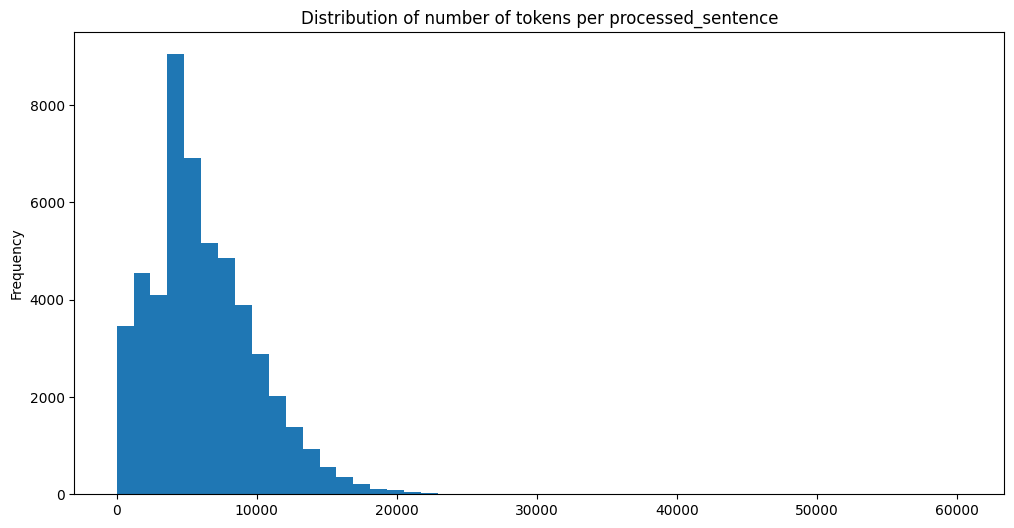

In [13]:
#Plot of normal distribution of number of tokens per processed_sentence
grouped_sentences['num_tokens'].plot(kind='hist', bins=50, figsize=(12,6), title='Distribution of number of tokens per processed_sentence')

In [15]:
#median number of tokens per processed_sentence
grouped_sentences['num_tokens'].median()

5476.0

In [21]:
#Create a new dataframe from processed_sentence with num_tokens of normal distribution of the data
grouped_sentences = grouped_sentences[grouped_sentences['num_tokens'] > 3]

In [22]:
#Call grouped_sentences_med head
grouped_sentences_med.head()

,article_id,sentence,processed_sentence,num_tokens
7,8,Association for Information Systems AIS Electr...,association for information systems ais electr...,5640
22,23,Association for Information Systems AIS Electr...,association for information systems ais electr...,5336
23,24,Association for Information Systems AIS Electr...,association for information systems ais electr...,5793
28,29,Association for Information Systems AIS Electr...,association for information systems ais electr...,5989
41,42,Rejecting and Retaining New Contributors in Op...,rejecting and retaining new contributors in op...,5961


In [23]:
#number of rows in grouped_sentences_med
len(grouped_sentences_med)

5513

In [18]:
#Save grouped_sentences_med to pickle
with open('Datasets/grouped_sentences_med.pkl', 'wb') as f:
    pickle.dump(grouped_sentences_med, f)

In [ ]:
# Count average tokens per article in grouped_sentences
avg_tokens_sentences = grouped_sentences['processed_text'].apply(lambda x: len(x.split())).mean()

print(avg_tokens_sentences)